In [100]:
# import all the required modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Upload the necessary dataset
df=pd.read_csv('/kaggle/input/bankdata/bank_data.csv')

In [102]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The above considered dataset consists a total of 4251 entries with 17 different columns where 7 of them are int datatype and the remaining are object datatype.

In [104]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


1.The mean value of age is 41.17
2.The youngest person and oldest person considered for the analysis is 19 and 87 years old
3.The max balance of a person from the dataset is around 71k
4.The data is considered where a person should have a account for atleast four days.

In [105]:
df.values

array([[30, 'unemployed', 'married', ..., 0, 'unknown', 'no'],
       [33, 'services', 'married', ..., 4, 'failure', 'no'],
       [35, 'management', 'single', ..., 1, 'failure', 'no'],
       ...,
       [57, 'technician', 'married', ..., 0, 'unknown', 'no'],
       [28, 'blue-collar', 'married', ..., 3, 'other', 'no'],
       [44, 'entrepreneur', 'single', ..., 7, 'other', 'no']],
      dtype=object)

In [106]:
df.value_counts

<bound method DataFrame.value_counts of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day mon

In [107]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The above dataset has no null values so there is no need for missing values analysis

<Axes: >

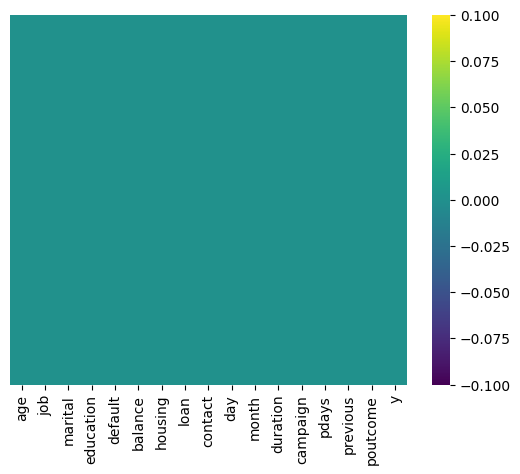

In [108]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

In [109]:
print(df.nunique())

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [110]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

1. Analysis between Age v/s Housing, here we will check which age group are already having house if not then they will be more prone to take a loan for house.  

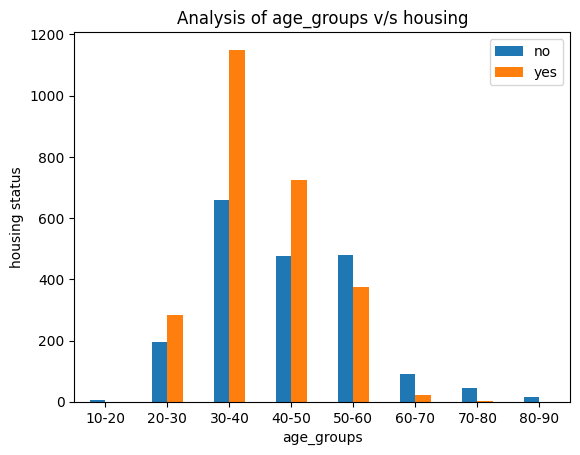

In [111]:
xlabels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
bins=[10,20,30,40,50,60,70,80,90]
age_housing=df.groupby(['age','housing']).size()
df['age_group']=pd.cut(df['age'],bins=bins,labels=xlabels,right=False)
age_counts=df.groupby(['age_group','housing']).size().unstack(fill_value=0)
age_counts.plot(kind='bar',stacked=False,rot=0)
plt.xlabel('age_groups')
plt.ylabel('housing status')
plt.title('Analysis of age_groups v/s housing')
plt.legend()

From the above plot we can conclude that:
1.In the age group of 30-40 there is a max people who are having houses and there exists a high chance taking house loans from this age group itself.
2.Followed by 40-50 and 50-60 from these age groups there is a mixed chances of taking house loans.

2. Analysis between educated v/s their loan status, which will check whether educated people or taking loans or not.

Text(0.5, 1.0, 'Analysis of No of loans taken v/s Education Level ')

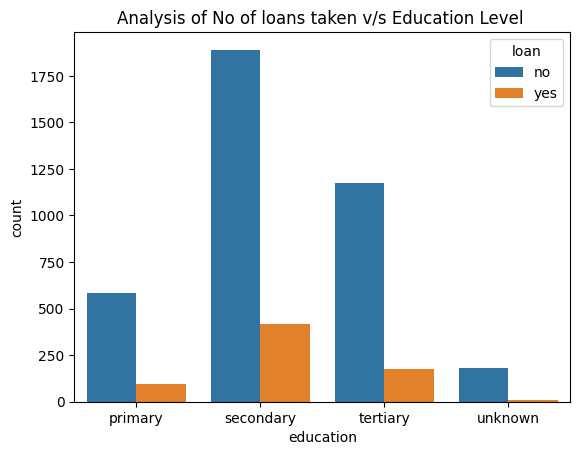

In [112]:
sns.countplot(x='education',hue='loan',data=df)
plt.title('Analysis of No of loans taken v/s Education Level ')

From the above plot it is clear that:
1.All the educated people are not tending to have loans and those who are having atleats secondary education are mostly not having a loan.
2.Those who have either primary or tertiary education because of unawareness & High necessity of money for education these groups are taking some small amount of loans.

3. Analysis of Monthly wise loan appraisals v/s the amount of ccampaign days taken by the banks to draw attention to make them take loans.

Text(0.5, 1.0, 'Analysis of No of Campaign days taken v/s Month')

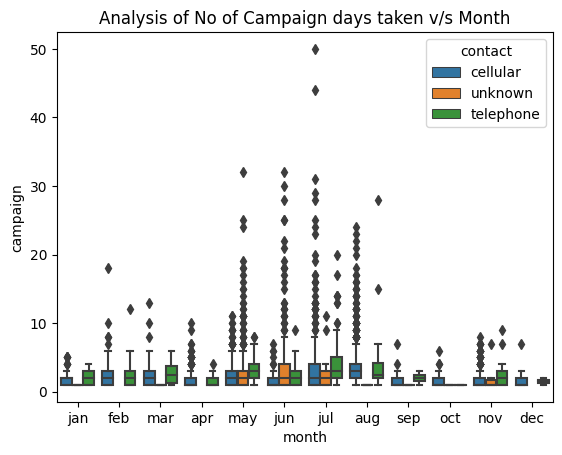

In [113]:
sns.boxplot(x='month',y='campaign',data=df,hue='contact',order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Analysis of No of Campaign days taken v/s Month')

From the above representation it is clear that:
1.In the month of june and july the campaign is conducted for max no of days
2.Followed by may and august where the campaign is successful through cellular
3.The campaign is not that successful in the months of February,april,october and december.

4.Analysis of loan Sanctioned v/s Payoutcome, from which we can make an assumption that approxly this many loans are sanctioned among which some are success,failure,unknown and other scenarios.

Text(0.5, 1.0, 'Analysis of Loan Sanction outcome v/s Loan Taken')

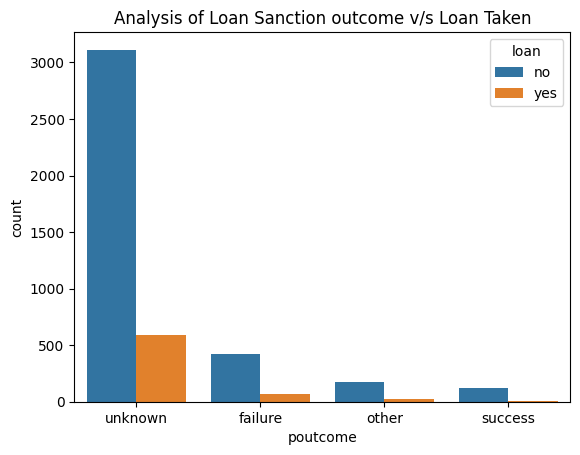

In [114]:
sns.countplot(x='poutcome',hue='loan',data=df)
plt.title('Analysis of Loan Sanction outcome v/s Loan Taken')

From the above plot we can conclude that:
1.The no of loan sanctions taken where the status is successful is very few.
2.The no of loans not sanctioned where the status is unknown is very high.

In order to perform the Decision Tree classifier first we need label encode the categorical values into  numerial.

Before perfroming Encoding process we should remove last column age group before proceeding

In [116]:
df.drop('age_group',inplace=True,axis=1)

In [117]:
month_map={'jan':'01','feb':'02','mar':'03','apr':'04','may':'05','jun':'06','jul':'07','aug':'08','sep':'09','oct':'10','nov':'11','dec':'12'}
df['month']=df['month'].map(month_map)

Label Encoding Mthod

In [118]:
from sklearn.preprocessing import LabelEncoder
fitmodel=LabelEncoder()
cat_val=['education','default','housing','loan','y']
df[cat_val] = df[cat_val].apply(lambda col: fitmodel.fit_transform(col))

In [119]:
print(df.head(10))

   age            job  marital  education  default  balance  housing  loan  \
0   30     unemployed  married          0        0     1787        0     0   
1   33       services  married          1        0     4789        1     1   
2   35     management   single          2        0     1350        1     0   
3   30     management  married          2        0     1476        1     1   
4   59    blue-collar  married          1        0        0        1     0   
5   35     management   single          2        0      747        0     0   
6   36  self-employed  married          2        0      307        1     0   
7   39     technician  married          1        0      147        1     0   
8   41   entrepreneur  married          2        0      221        1     0   
9   43       services  married          0        0      -88        1     1   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   19    10        79         1     -1         0  unknow

One Hot Encoding Method

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
Encoding_columns=['job','marital','contact','poutcome']
ct=ColumnTransformer(transformers=[('OneHotEncoding',OneHotEncoder(),Encoding_columns)],remainder='passthrough')
df=np.array(ct.fit_transform(df))           

converting string to int datatype

In [121]:
df[:,29]=df[:,29].astype(int)

In [124]:
X=df[:,:-1]
Y=df[:,-1]

In [125]:
X=X.astype(int)
Y=Y.astype(int)

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [127]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [128]:
Y_pred=Classifier.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)  # This is the final step.

[[1095   95]
 [  93   74]]


0.8614591009579956